# <center>Тема 1. Разведочный анализ данных</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

Мы будем работать с данными [Titanic](https://www.kaggle.com/c/titanic): он содержит информацию о пассажирах корабля, включая их демографические характеристики и выжил пассажир или нет.

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [3]:
data = pd.read_csv('./titanic.csv',
                  index_col='PassengerId')

## Описание данных

**Обучающий набор содержит признак Survived для каждого пассажира, обозначающий, выжил данный пассажир или нет (0 для умерших, 1 для выживших).**

**Каждая строчка наборов данных содержит следующие поля:**

**Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);**

**Name — имя;**

**Sex — пол;**

**Age — возраст;**

**SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;**

**Parch — количество родителей, детей (в том числе приемных) на борту титаника;**

**Ticket — номер билета;**

**Fare — плата за проезд;**

**Cabin — каюта;**

**Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).**

**Вывести размер таблицы**

In [42]:
rows, columns = data.shape
print(f"Количество строк: {rows}")
print(f"Количество столбцов: {columns}")
# или
print(data.info)

Количество строк: 891
Количество столбцов: 11
<bound method DataFrame.info of              Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5           

**Данные представлены в виде таблицы. Вывести первые 5 строк:**

In [5]:
print("Первые пять строк:")
print(data.head(5))

Первые пять строк:
             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.

**Вывести описательную статистику**

In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Определите, сколько пассажиров выжило, а сколько - нет?**

In [7]:
print(f"Количество выживших пассажиров: {len(data[data['Survived'] == 1])}")
print(f"Количество пагибших пассажиров: {len(data[data['Survived'] == 0])}")
# или 
print(f"Количество пагибших пассажиров: {len(data) - len(data[data['Survived'] == 1])}")

Количество выживших пассажиров: 342
Количество пагибших пассажиров: 549
Количество пагибших пассажиров: 549


**Правда ли, что пассажиры более высокого класса имеют большие шансы на спасение?**

Для вычислений использовать groupby

In [8]:
print(data[data['Survived'] == 1].groupby('Pclass').count())
# или более точная информация
print(data[data['Survived'] == 1].groupby('Pclass')['Survived'].count())

        Survived  Name  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  Embarked
Pclass                                                                       
1            136   136  136  122    136    136     136   136    117       134
2             87    87   87   83     87     87      87    87     13        87
3            119   119  119   85    119    119     119   119      6       119
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


Можно сделать вывод о том, что более высокий класс не гарантирует более высокую выживаемость, так как в третьем классе выживаемость почти такая же.

**Правда ли, что женщины имеют большие шансы на спасение?**

Для вычислений использовать groupby

In [9]:
print(data[data['Survived'] == 1].groupby('Sex').count())
# или более точная информация
print(data[data['Survived'] == 1].groupby('Sex')['Survived'].count())

        Survived  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  Cabin  \
Sex                                                                      
female       233     233   233  197    233    233     233   233     91   
male         109     109   109   93    109    109     109   109     45   

        Embarked  
Sex               
female       231  
male         109  
Sex
female    233
male      109
Name: Survived, dtype: int64


Да, женщин выжило значительно больше, чем мужчин.

**Cколько мужчин и женщин в каждом классе (Pclass)?**

Результаты представить в виде таблицы сопряженности.

In [10]:
pd.crosstab(data['Pclass'], data['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


**Вывести пассажиров, которые сели в Шербуре (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200). Отсортировать этих пассажиров по убыванию платы за билет.**

In [11]:
data[(data['Embarked'] == 'C') & (data['Fare'] > 200)].sort_values(by='Fare', ascending=False)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C


**Создать категориальный признак для заданных градаций возраста пассажира.**

In [33]:
data_with_age_cat = data.copy()
def age_category(age):
    if age < 30:
        return '1'
    elif age > 60:
        return '3'
    else:
        return '2'

data_with_age_cat['Age_category'] = data_with_age_cat['Age'].apply(age_category)

In [34]:
data_with_age_cat = data.copy()
data_with_age_cat['Age_category'] = pd.cut(data_with_age_cat['Age'], bins=[0, 30, 55, 100], labels=['1', '2', '3'], right=False)
print(data_with_age_cat)

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...       

**Определить, сколько мужчин / женщин находилось на борту?**

In [14]:
data.groupby('Sex').count()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,314,314,314,261,314,314,314,314,97,312
male,577,577,577,453,577,577,577,577,107,577


**Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Определить, сколько было мужчин 2-го класса**

In [36]:
print(f"Распределение переменной Pclass: {data.groupby('Pclass').size()}")
print(f"Распределение переменной Pclass для мужчин: {data[data['Sex'] == 'male'].groupby('Pclass').size()}")
print(f"Распределение переменной Pclass для женщин: {data[data['Sex'] == 'female'].groupby('Pclass').size()}")
print(f"Мужчин второго класса: {data[(data['Sex'] == 'male') & (data['Pclass'] == 2)].groupby('Pclass').size()}")

Распределение переменной Pclass: Pclass
1    216
2    184
3    491
dtype: int64
Распределение переменной Pclass для мужчин: Pclass
1    122
2    108
3    347
dtype: int64
Распределение переменной Pclass для женщин: Pclass
1     94
2     76
3    144
dtype: int64
Мужчин второго класса: Pclass
2    108
dtype: int64


**Определите, какова доля выживших пассажиров из класса 3? А пассажиров из класса 1?**

In [37]:
pas_in_3_class = data[data['Pclass'] == 3].count()['Pclass']
pas_in_1_class = data[data['Pclass'] == 1].count()['Pclass']
pas_in_3_class_survived = data[(data['Pclass'] == 3) & (data['Survived'] == 1)].count()['Pclass']
pas_in_1_class_survived = data[(data['Pclass'] == 1) & (data['Survived'] == 1)].count()['Pclass']
# print(pas_in_3_class)
# print(pas_in_1_class)
# print(pas_in_3_class_survived)
# print(pas_in_1_class_survived)
print(f"Доля выживших в третьем классе: {pas_in_3_class_survived / pas_in_3_class}")
print(f"Доля выживших в первом классе: {pas_in_1_class_survived / pas_in_1_class}")

Доля выживших в третьем классе: 0.24236252545824846
Доля выживших в первом классе: 0.6296296296296297


**Определить медиану и стандартное отклонение платежей (`Fare`). Округлить до 2 десятичных знаков.**

In [17]:
print(f"Медиана для платежей равна: {round(data['Fare'].median(), 2)}")
print(f"Стандартное отклонение для платежей равно: {round(data['Fare'].std(), 2)}")

Медиана для платежей равна: 14.45
Стандартное отклонение для платежей равно: 49.69


**Проверить, что люди моложе 30 лет выживают чаще, чем люди старше 60 лет. Определить доли выживших в обеих группах**

In [38]:
under_30_general = data[data['Age'] < 30]['Survived'].count()
under_30_survived = data[(data['Age'] < 30) & (data['Survived'] == 1)]['Survived'].count()
under_60_general = data[(data['Age'] > 30) & (data['Age'] < 60)]['Survived'].count()
under_60_survived = data[(data['Age'] > 30) & (data['Age'] < 60) & (data['Survived'] == 1)]['Survived'].count()
after_60_general = data[data['Age'] > 60]['Survived'].count()
after_60_survived = data[(data['Age'] > 60) & (data['Survived'] == 1)]['Survived'].count()
fraction_under_30 = under_30_survived / under_30_general
fraction_under_60 = under_60_survived / under_60_general
fraction_after_60 = after_60_survived / after_60_general
print(f"Количество выживших до 30 лет: {under_30_survived}")
print(f"Доля выживших до 30 лет: {fraction_under_30}")
print(f"Количество выживших между 30 и 60 лет: {under_60_survived}")
print(f"Доля выживших между 30 и 60 лет: {fraction_under_60}")
print(f"Количество выживших после 60 лет: {under_30_survived}")
print(f"Доля выживших после 60 лет: {fraction_after_60}")

Количество выживших до 30 лет: 156
Доля выживших до 30 лет: 0.40625
Количество выживших между 30 и 60 лет: 117
Доля выживших между 30 и 60 лет: 0.41935483870967744
Количество выживших после 60 лет: 156
Доля выживших после 60 лет: 0.22727272727272727


**Проверить, что женщины выживают чаще мужчин. Определить доли выживших в обеих группах**

In [19]:
male_general = data[data['Sex'] == 'male']['Survived'].count()
male_survived = data[(data['Sex'] == 'male') & (data['Survived'] == 1)]['Survived'].count()
female_general = data[data['Sex'] == 'female']['Survived'].count()
female_survived = data[(data['Sex'] == 'female') & (data['Survived'] == 1)]['Survived'].count()
print(f"Количество выживших мужчин: {male_survived}")
print(f"Доля выживших мужчин: {male_survived / male_general}")
print(f"Количество выживших женщин: {female_survived}")
print(f"Доля выживших женщин: {female_survived / female_general}")

Количество выживших мужчин: 109
Доля выживших мужчин: 0.18890814558058924
Количество выживших женщин: 233
Доля выживших женщин: 0.7420382165605095


**Найдите самое популярное имя среди пассажиров Титаника мужского пола**

In [43]:
print(f"Наиболее встречающееся имя: {data['Name'].mode()[2]}")

Наиболее встречающееся имя: Abbott, Mrs. Stanton (Rosa Hunt)


**Определить, как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания. Выберать верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [21]:
print(f"Средний возрастр для каждого класса у мужчин:")
print(data[data['Sex'] == 'male'].groupby('Pclass')['Age'].mean())
print(f"Средний возрастр для каждого класса у женщин:")
print(data[data['Sex'] == 'female'].groupby('Pclass')['Age'].mean())

Средний возрастр для каждого класса у мужчин:
Pclass
1    41.281386
2    30.740707
3    26.507589
Name: Age, dtype: float64
Средний возрастр для каждого класса у женщин:
Pclass
1    34.611765
2    28.722973
3    21.750000
Name: Age, dtype: float64


Номера верных утверждений: 1, 3, 4 

**Визуализируйте пропуски**

Используем библиотеку `missingno`

<Axes: >

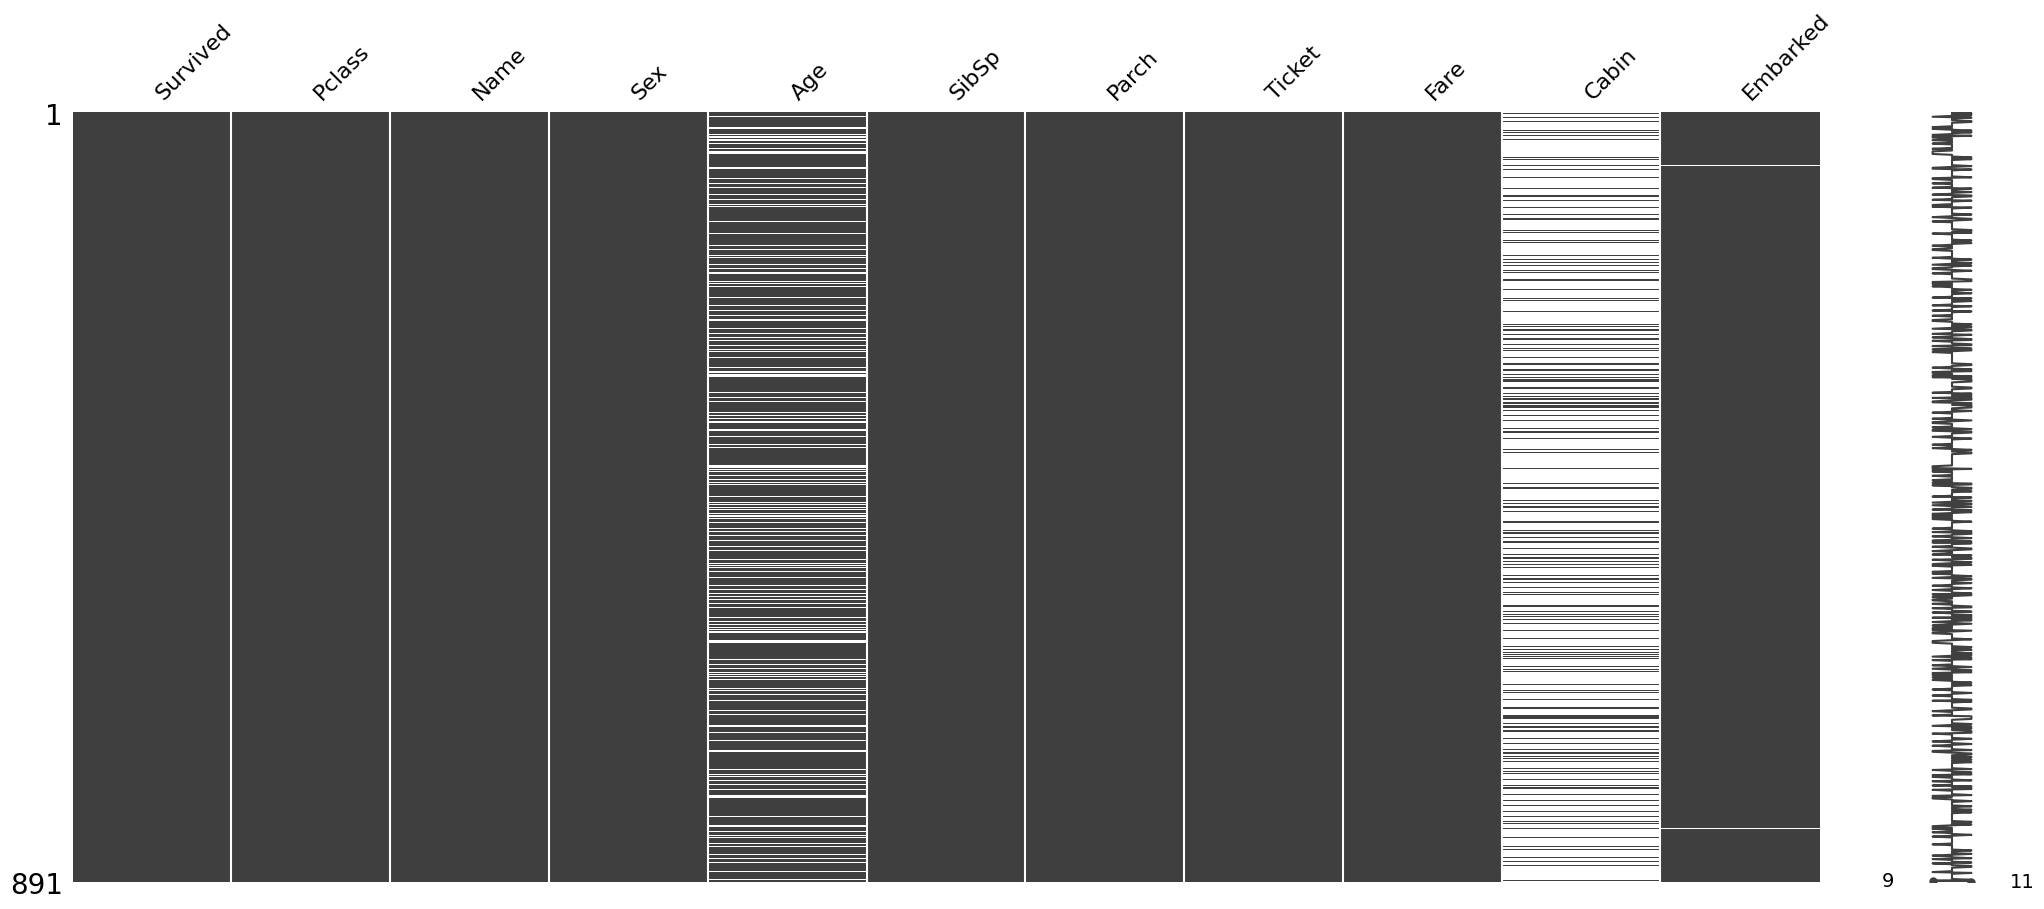

In [22]:
import missingno 
missingno.matrix(data)

**Выкинем признак Cabin. Столбец Age заполним медианным значением. Оставшиеся строки с пропусками удалим.**

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...       

<Axes: >

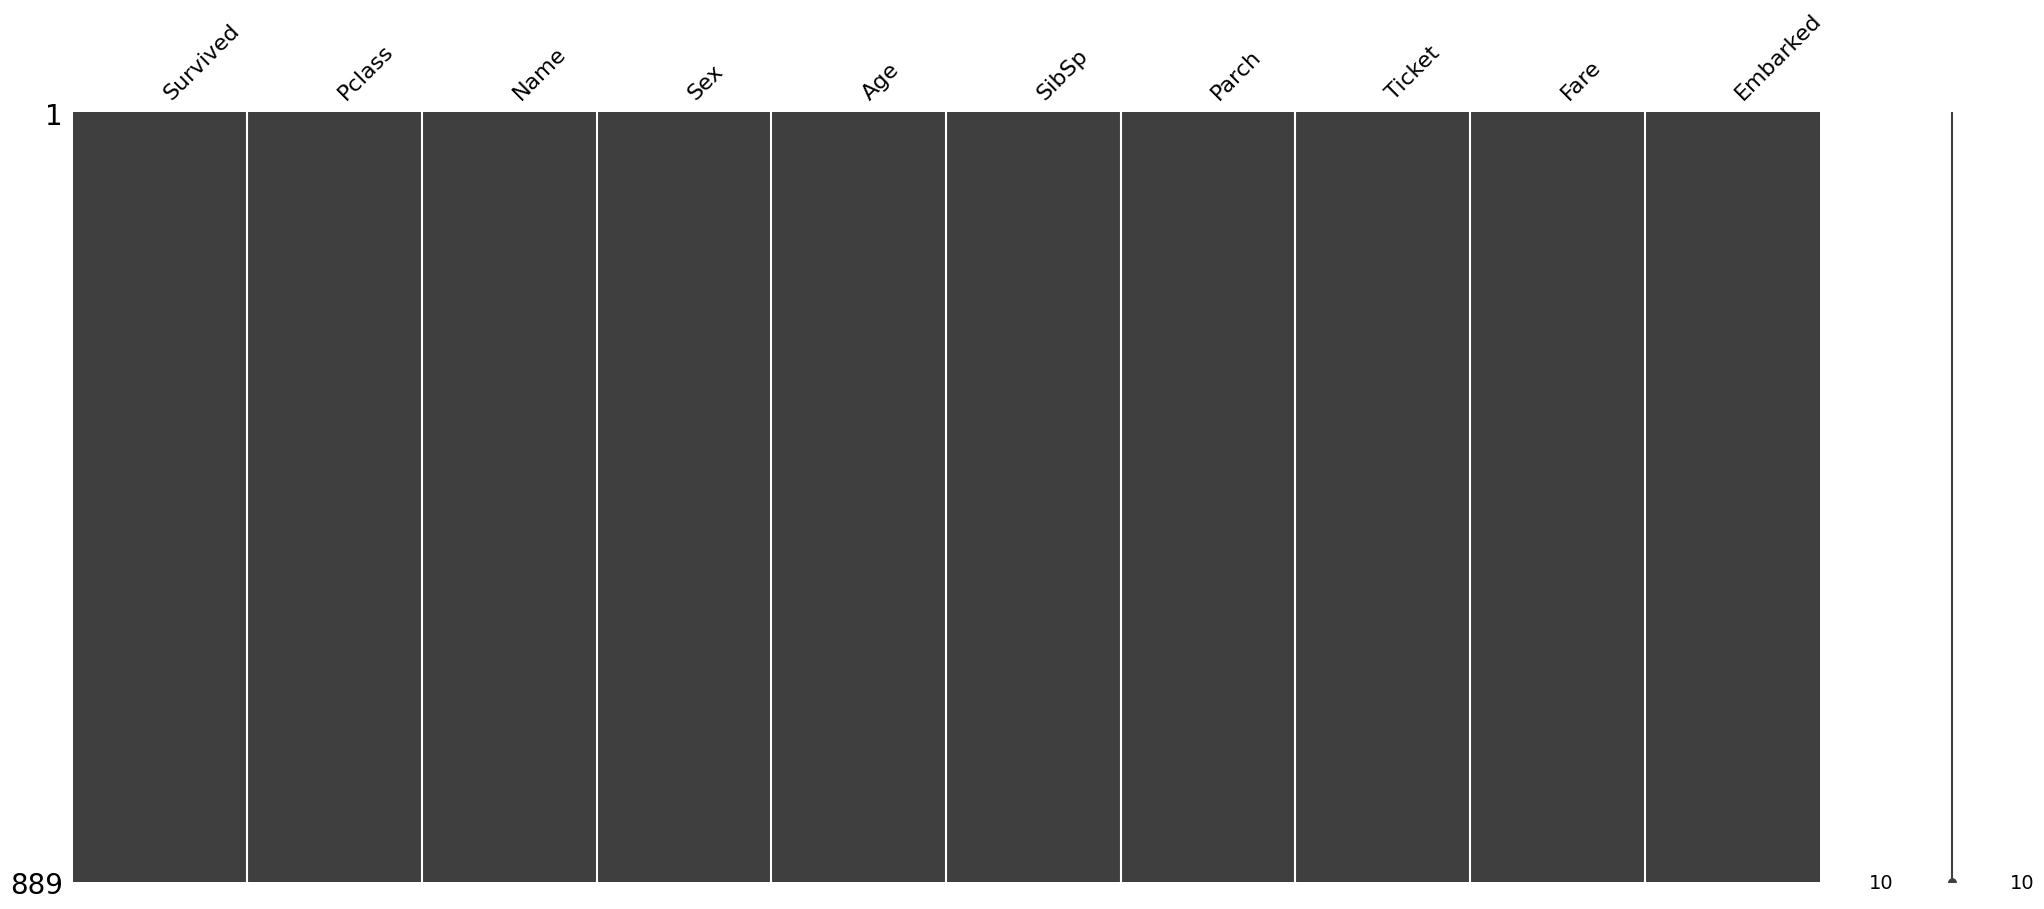

In [23]:
data_without_cabin = data.drop('Cabin', axis=1)
data_without_cabin['Age'] = data_without_cabin['Age'].fillna(data_without_cabin['Age'].median())
data_without_cabin = data_without_cabin.dropna()
print(data_without_cabin)
missingno.matrix(data_without_cabin)

**Для категориальных переменных построить столбчатую диаграмму**

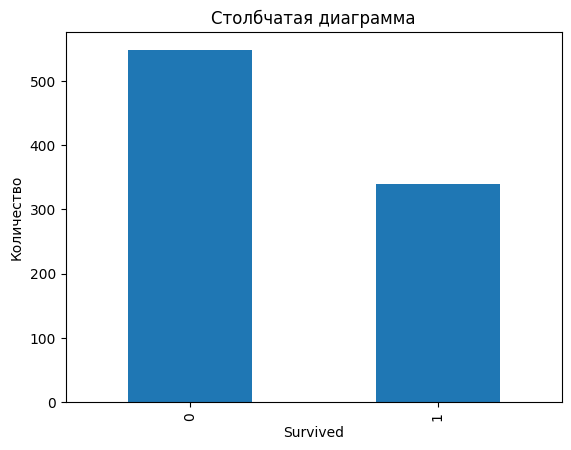

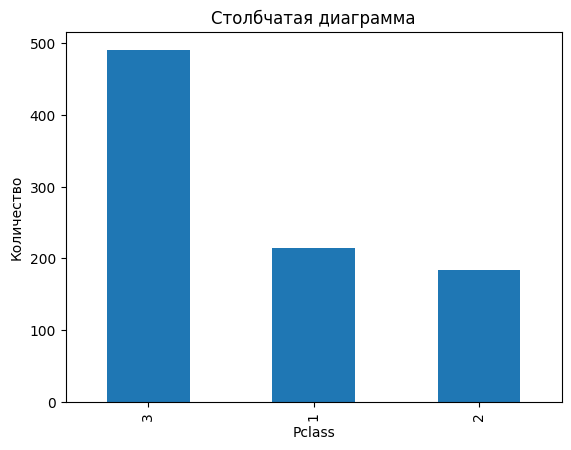

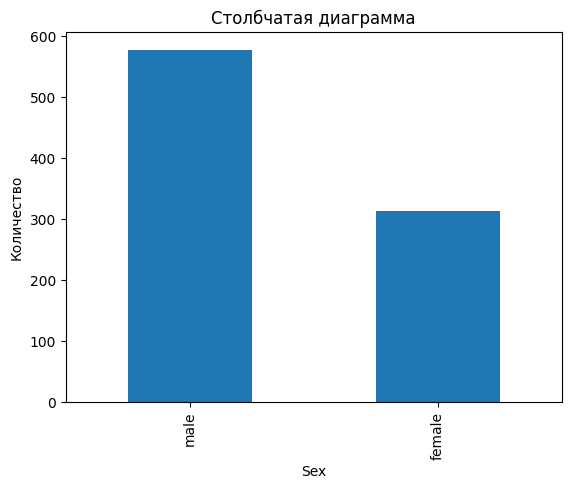

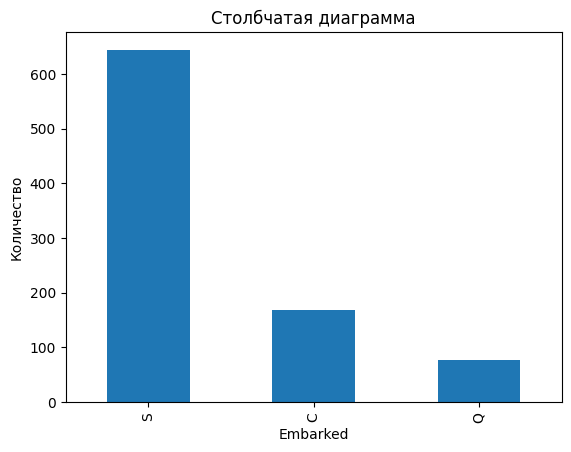

In [39]:
import seaborn
import matplotlib.pyplot as plt
def diagram_column(series):
    value_counts = series.value_counts()
    value_counts.plot(kind='bar')
    plt.xlabel(series.name)
    plt.ylabel('Количество')
    plt.title('Столбчатая диаграмма')
    plt.show()

diagram_column(data_without_cabin['Survived'])
diagram_column(data_without_cabin['Pclass'])
diagram_column(data_without_cabin['Sex'])
diagram_column(data_without_cabin['Embarked'])

**Постройте попарные зависимости (диаграммы рассеяния) для признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

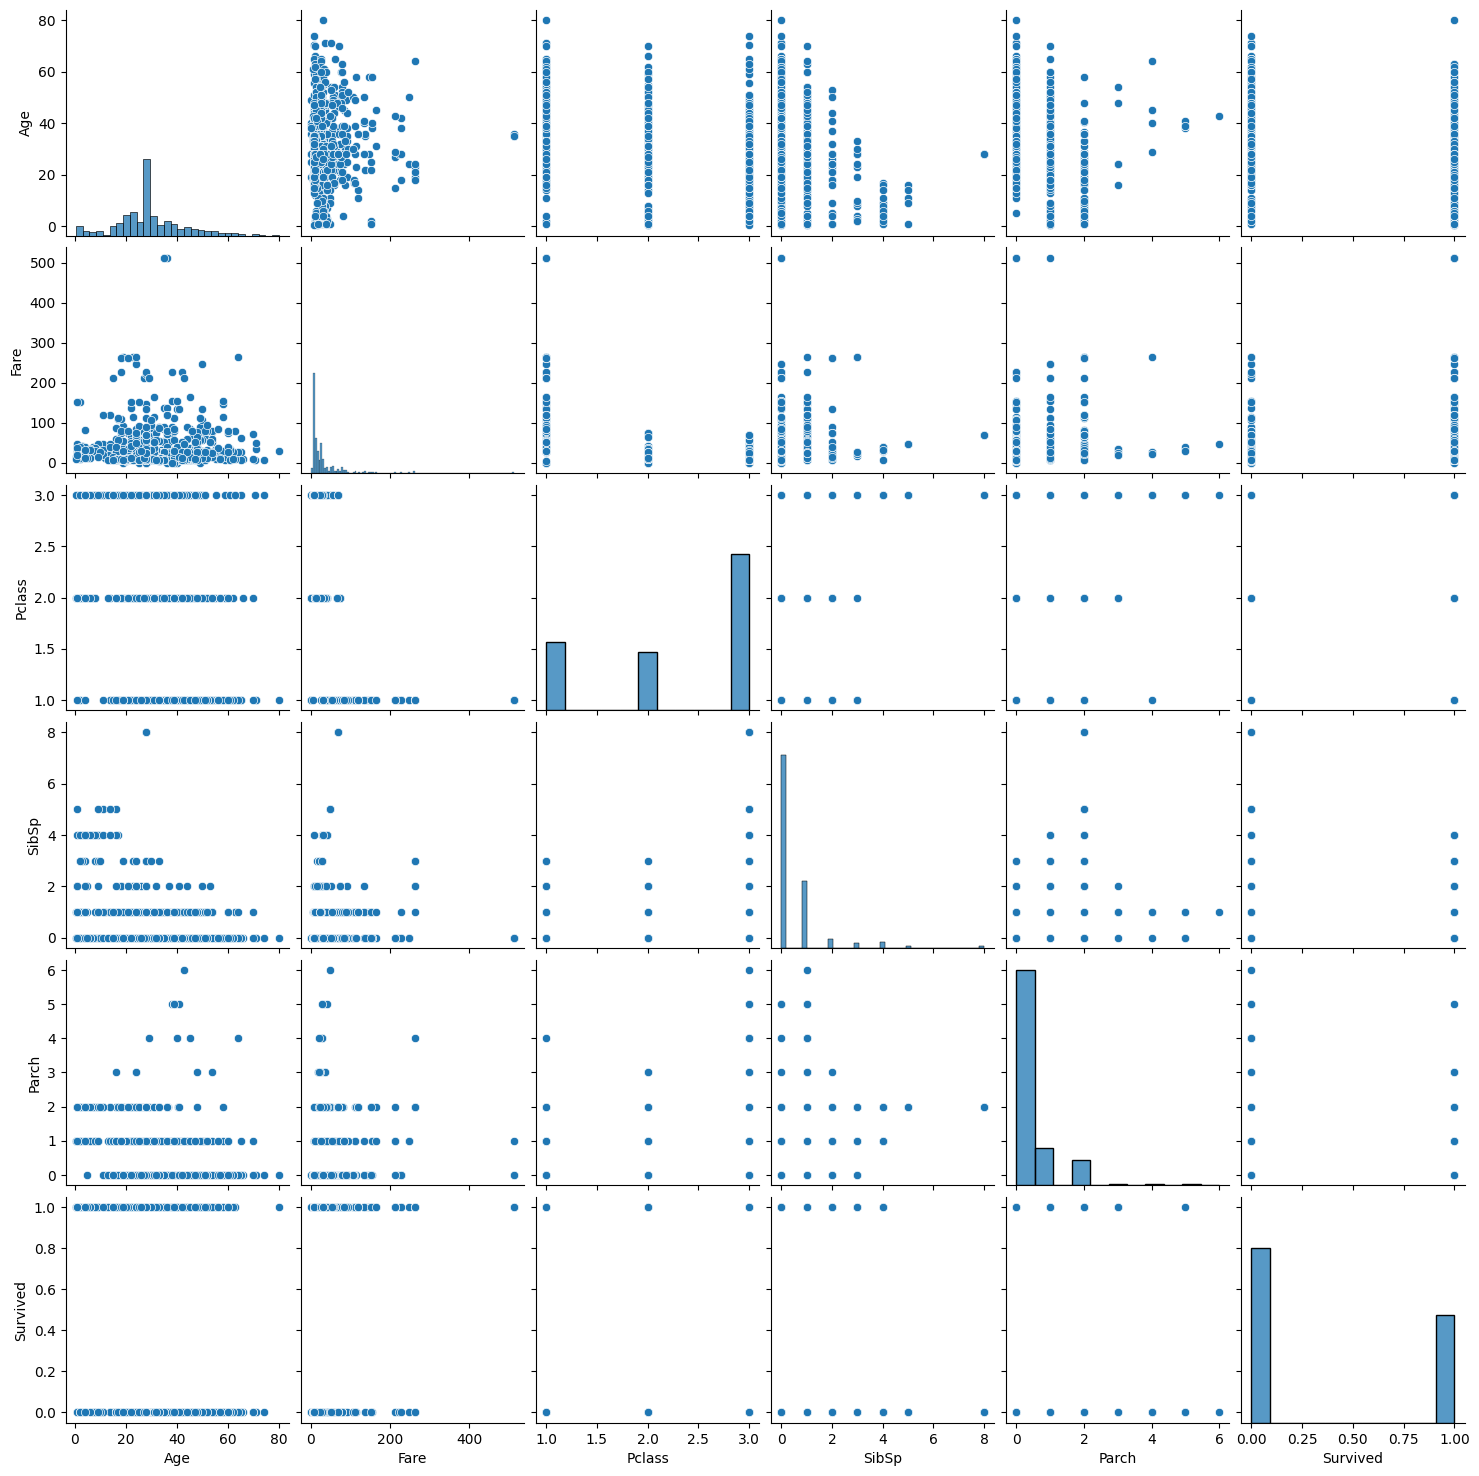

In [25]:
# pd.plotting.scatter_matrix(data_without_cabin[['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']])
# plt.show()
seaborn.pairplot(data_without_cabin[['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']])
plt.show()

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

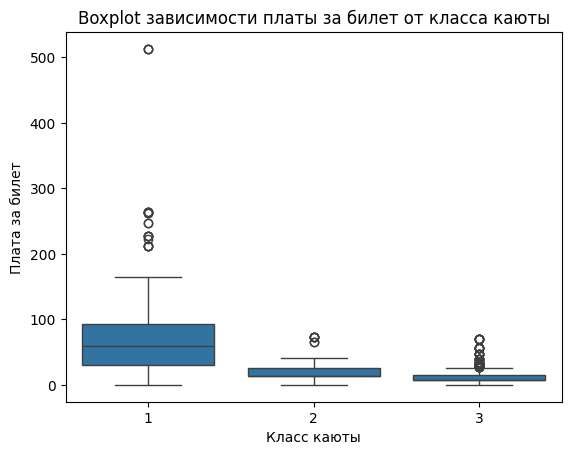

In [26]:
plt.figure()
seaborn.boxplot(x='Pclass', y='Fare', data=data_without_cabin)
plt.xlabel('Класс каюты')
plt.ylabel('Плата за билет')
plt.title('Boxplot зависимости платы за билет от класса каюты')
plt.show()

**Такой boxplot получается не очень красивым из-за выбросов.**

**Опционально: создайте признак Fare_no_out (стоимости без выбросов), в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости. Постройте boxplot.**

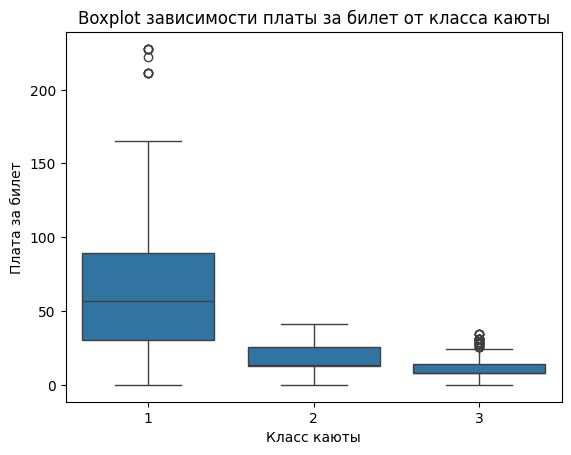

In [27]:
train_df = data_without_cabin.copy()
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare'] # Серия стоимости только для первого класса
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare'] # Серия стоимости только для второго класса
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare'] # Серия стоиммости только для третьего класса
mean_fare_cl1 = fare_pclass1.mean() # средняя для первого класса
mean_fare_cl2 = fare_pclass2.mean()# средняя для второго класса
mean_fare_cl3 = fare_pclass3.mean()# средняя для третьего класса
std_fare_cl1 = fare_pclass1.std() # std для первого класса
std_fare_cl2 = fare_pclass2.std() # std для второго класса
std_fare_cl3 = fare_pclass3.std() # std для третьего класса
fare_pclass1_no_out = fare_pclass1[abs(fare_pclass1 - mean_fare_cl1) <= 2 * std_fare_cl1]
fare_pclass2_no_out = fare_pclass2[abs(fare_pclass2 - mean_fare_cl2) <= 2 * std_fare_cl2]
fare_pclass3_no_out = fare_pclass3[abs(fare_pclass3 - mean_fare_cl3) <= 2 * std_fare_cl3]
train_df['Fare_no_out'] = pd.concat([fare_pclass1_no_out, fare_pclass2_no_out, fare_pclass3_no_out])
# print(train_df['Fare_no_out'])
plt.figure()
seaborn.boxplot(x='Pclass', y='Fare_no_out', data=train_df.dropna())
plt.xlabel('Класс каюты')
plt.ylabel('Плата за билет')
plt.title('Boxplot зависимости платы за билет от класса каюты')
plt.show()
# missingno.matrix(train_df.dropna())

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot (столбчатая диаграмма) c аргументом hue.**

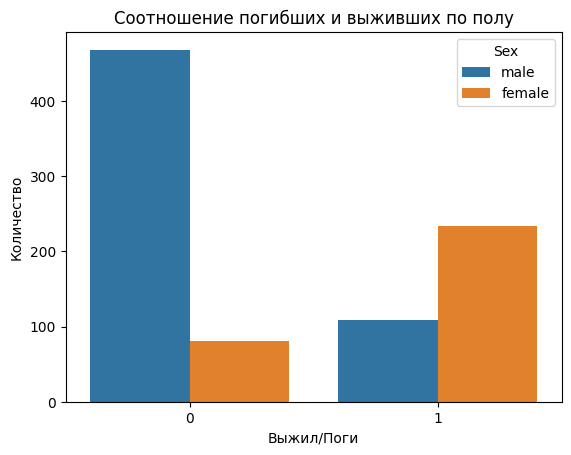

In [28]:
plt.figure()
seaborn.countplot(x='Survived', hue='Sex', data=data)
plt.xlabel('Выжил/Поги')
plt.ylabel('Количество')
plt.title('Соотношение погибших и выживших по полу')
plt.show()

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.** 

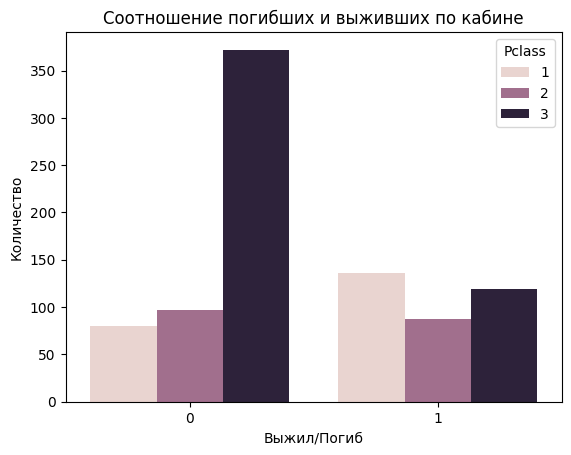

In [29]:
plt.figure()
seaborn.countplot(x='Survived', hue='Pclass', data=data)
plt.xlabel('Выжил/Погиб')
plt.ylabel('Количество')
plt.title('Соотношение погибших и выживших по кабине')
plt.show()

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.**

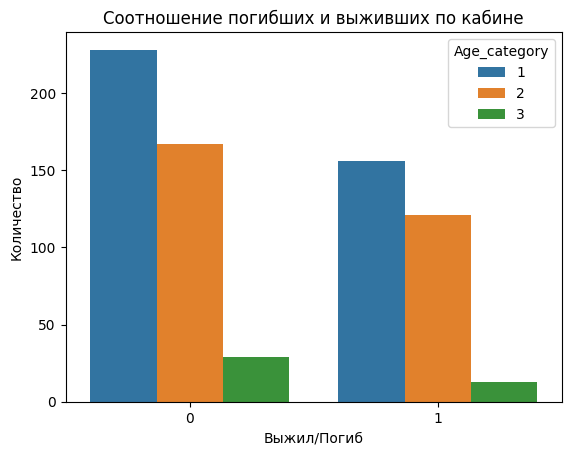

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN


In [30]:
plt.figure()
seaborn.countplot(x='Survived', hue='Age_category', data=data_with_age_cat)
plt.xlabel('Выжил/Погиб')
plt.ylabel('Количество')
plt.title('Соотношение погибших и выживших по кабине')
plt.show()

data_with_age_cat

**Построить корреляционную матрицу. Выделить признаки, которые имень сильную корреляцию с целевой переменной**

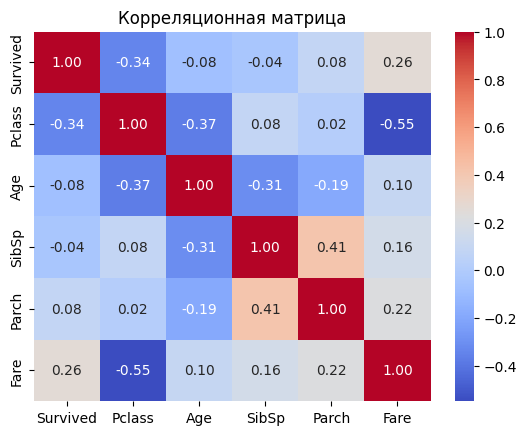

Признаки с сильной корреляцией:
['Survived', 'Pclass', 'Fare']


In [41]:
matrix = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

plt.figure()
seaborn.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

strongly_correlated_features = matrix[abs(matrix['Survived']) > 0.2].index.tolist()
print("Признаки с сильной корреляцией:")
print(strongly_correlated_features)